## Import libraries

In [62]:
# Install the required packages
# %pip install opencv-python tensorflow pillow scikit-learn keras

import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.utils import to_categorical

## Load dataset

In [4]:
image_directory = 'dataset/'

In [10]:
no_tumor_images = os.listdir(image_directory+ 'no/')
yes_tumor_images = os.listdir(image_directory+ 'yes/')

dataset=[]
label=[]
print(no_tumor_images)

['no0.jpg', 'no1.jpg', 'no10.jpg', 'no100.jpg', 'no1000.jpg', 'no1001.jpg', 'no1002.jpg', 'no1003.jpg', 'no1004.jpg', 'no1005.jpg', 'no1006.jpg', 'no1007.jpg', 'no1008.jpg', 'no1009.jpg', 'no101.jpg', 'no1010.jpg', 'no1011.jpg', 'no1012.jpg', 'no1013.jpg', 'no1014.jpg', 'no1015.jpg', 'no1016.jpg', 'no1017.jpg', 'no1018.jpg', 'no1019.jpg', 'no102.jpg', 'no1020.jpg', 'no1021.jpg', 'no1022.jpg', 'no1023.jpg', 'no1024.jpg', 'no1025.jpg', 'no1026.jpg', 'no1027.jpg', 'no1028.jpg', 'no1029.jpg', 'no103.jpg', 'no1030.jpg', 'no1031.jpg', 'no1032.jpg', 'no1033.jpg', 'no1034.jpg', 'no1035.jpg', 'no1036.jpg', 'no1037.jpg', 'no1038.jpg', 'no1039.jpg', 'no104.jpg', 'no1040.jpg', 'no1041.jpg', 'no1042.jpg', 'no1043.jpg', 'no1044.jpg', 'no1045.jpg', 'no1046.jpg', 'no1047.jpg', 'no1048.jpg', 'no1049.jpg', 'no105.jpg', 'no1050.jpg', 'no1051.jpg', 'no1052.jpg', 'no1053.jpg', 'no1054.jpg', 'no1055.jpg', 'no1056.jpg', 'no1057.jpg', 'no1058.jpg', 'no1059.jpg', 'no106.jpg', 'no1060.jpg', 'no1061.jpg', 'no106

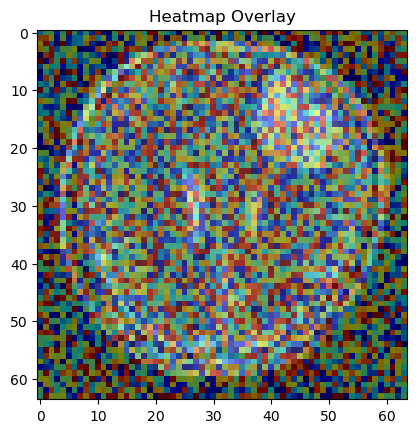

In [ ]:
# Assuming 'cam' is a heatmap or similar data that you want to overlay on the image

cam = np.random.random((64, 64))  # Replace this with your actual 'cam' data

plt.imshow(image, cmap='gray')
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.title('Heatmap Overlay')
plt.show()

In [6]:
path = 'no0.jpg'
print(path.split('.')[1])

jpg


In [19]:
for i, image_name in enumerate(no_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + 'no/' + image_name)
        if image is not None:
            image = Image.fromarray(image, 'RGB')
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(0)
            
for i, image_name in enumerate(yes_tumor_images):
    if image_name.split('.')[1] == 'jpg':
        image = cv2.imread(image_directory + 'yes/' + image_name)
        if image is not None:
            image = Image.fromarray(image, 'RGB')
            image = image.resize((64, 64))
            dataset.append(np.array(image))
            label.append(1)
   
print(dataset) 
print(label)        
            

[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,

In [21]:
#the length of the dataset and label should be the same
print(len(dataset))
print(len(label))

6000
6000


In [22]:
#convert the dataset and label to numpy array
dataset = np.array(dataset)
label = np.array(label)

## Split Data

In [26]:
# divide the dataset into training and testing set split 80% training and 20% testing
# the dataset is X and the label is y

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)

(4800, 64, 64, 3)
(4800,)


4800 is the num of images in training set, 64*64 size of each image and 3 channels (RGB)

In [28]:
# for testing set
print(X_test.shape)
print(y_test.shape)

(1200, 64, 64, 3)
(1200,)


## Normalize Data

In [32]:
# to normalize the dataset using keras.utils.normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [40]:
#(2) Prepare labels for categorical cross-entropy loss

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

## Build the Model

In [ ]:
# model building :  the CNN architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3))) # 32 is the number of filters and (3, 3) is the size of the filter, (64,64,3) is image input size and channels
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 


model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#To make all images in one factor(linearly)(1st step) 
model.add(Flatten())            # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64)) 
model.add(Activation('relu'))   # relu is used for non-linear activation
model.add(Dropout(0.5))         # Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.Its used to minimize overfitting problem
model.add(Dense(1))             # output layer with 1 unit (since it's a binary classification problem(yes or no))
model.add(Activation('sigmoid'))    # sigmoid is used at the output layer
                            
                                                        

c:\Users\HEMASREE\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
#(2) for categorical
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3))) # 32 is the number of filters and (3, 3) is the size of the filter, (64,64,3) is image input size and channels
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform')) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 


model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
 
# (2nd step) for categorical crossentropy                            
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64)) 
model.add(Activation('relu')) # relu is used for non-linear activation
model.add(Dropout(0.5)) # Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.Its used to minimize underfitting problem
model.add(Dense(2)) # output layer with 2 unit 
model.add(Activation('softmax')) # softmax is used at the output layer

c:\Users\HEMASREE\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile and Fit the Model

Configure the model for training and fit it to the training data.

In [36]:
 # Binary cross entropy = 1, sigmoid. 
 # Categorical cross entropy = 2, softmax
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])            #(binary_crossentropy for binary classification)
 
model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.6772 - loss: 0.5834 - val_accuracy: 0.8467 - val_loss: 0.3629
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8566 - loss: 0.3345 - val_accuracy: 0.9083 - val_loss: 0.2315
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9259 - loss: 0.2064 - val_accuracy: 0.9583 - val_loss: 0.1450
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9659 - loss: 0.1119 - val_accuracy: 0.9683 - val_loss: 0.1086
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.9804 - loss: 0.0650 - val_accuracy: 0.9750 - val_loss: 0.0841
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9887 - loss: 0.0409 - val_accuracy: 0.9750 - val_loss: 0.0795
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9945 - loss: 0.0233 - val_accuracy: 0.9858 - val_loss: 0.0668
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9969 - loss: 0.0170 - v

In [42]:
#(2)
#categorical crossentropy

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])        #(categorical_crossentropy for multi-class classification)
 
model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.6935 - loss: 0.5621 - val_accuracy: 0.8267 - val_loss: 0.3665
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8595 - loss: 0.3353 - val_accuracy: 0.9100 - val_loss: 0.2327
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.9178 - loss: 0.2093 - val_accuracy: 0.9550 - val_loss: 0.1418
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9629 - loss: 0.1139 - val_accuracy: 0.9725 - val_loss: 0.0984
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9793 - loss: 0.0634 - val_accuracy: 0.9808 - val_loss: 0.0674
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.9920 - loss: 0.0294 - val_accuracy: 0.9908 - val_loss: 0.0538
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.9980 - loss: 0.0183 - val_accuracy: 0.9858 - val_loss: 0.0688
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.9948 - loss: 0.0162 - va

In [37]:
# save the model 

model.save('Brain_tumor.h5')

In [43]:
# save categorical model
model.save('Brain_tumor_categorical.h5')

## Evaluate the Model

In [54]:
# Evaluate the model

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9834 - loss: 0.0760
Test Loss: 0.07554734498262405, Test Accuracy: 0.9858333468437195


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


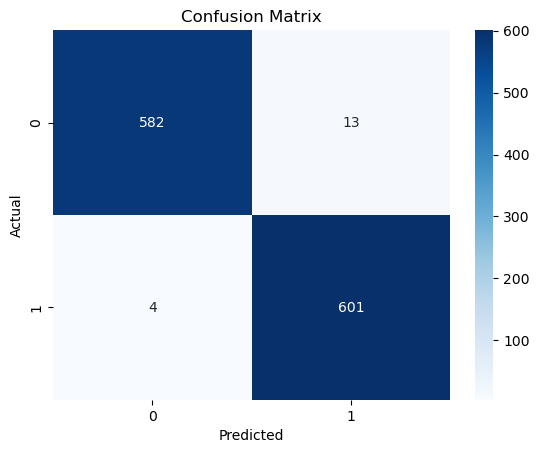

In [55]:
# confusion matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

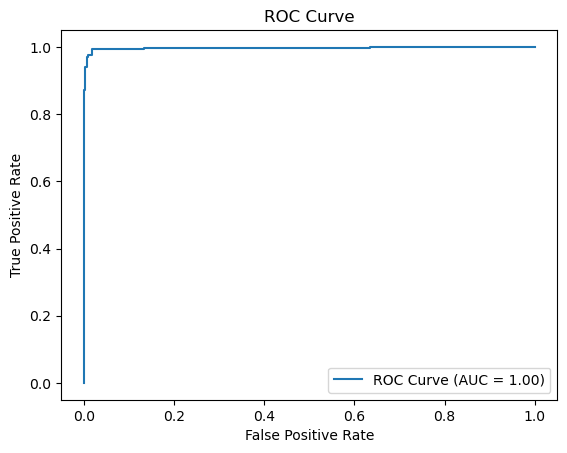

In [61]:

fpr, tpr, thresholds = roc_curve(y_true, y_pred[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Result


- It correctly classified 98.58% of the images, which is a very high accuracy for a classification task.

- The loss value is very low, indicating that the model’s predictions are highly accurate and confident.